# Churning: Customer churn (or customer attrition) refers to the loss of customers or subscribers for any reason or Migrating from one company to another

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
from sklearn.metrics import * #Evaluation of the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  # In spliting the data
from sklearn.linear_model import LogisticRegression
#Algorithms

In [5]:
df=pd.read_csv("customer_churn.csv")

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


churn yes: leaving the company 

churn no: not laving

Insights

* There is a combination of continuous and discrete columns in the data
* CustomerID columns, it is not very relevant
* Target Columns is Churn
* MonthlyCharges and TotalCharges, they can be used for framing a regression problem

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


What is the diff between info() and describe()
* Info(): This will give you a ageneral idea of the data
* Describe(): This will five the statistical info about the data

In [17]:
df.describe(include="O").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [19]:
df=df.drop(["customerID"],axis=1)

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# SHape Inspection

In [23]:
print(f"Rows:{df.shape[0]}")
print(f"Columns:{df.shape[1]}")

Rows:7043
Columns:20


In [26]:
df["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [25]:
df[df["TotalCharges"]==" "].shape

(11, 20)

There are multiple ways to tackle this problem
* We can replace this space by the mean
* We can convert these spaces into NaN, and then can drop them

In [27]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan).astype(float)

In [28]:
df[df["TotalCharges"]==" "].shape

(0, 20)

In [29]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [30]:
df[df["TotalCharges"]==" "].shape

(0, 20)

In [31]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
df=df.dropna()

In [33]:
df=df.drop_duplicates()

In [34]:
senior_male_electronic=df[(df["SeniorCitizen"]==1)&(df["gender"]=="Male")&(df["PaymentMethod"]=="Electronic check")]

In [35]:
senior_male_electronic.shape

(298, 20)

In [36]:
customer_total_tenure=df[(df["tenure"]>70)&(df["MonthlyCharges"]>100)]

In [37]:
customer_total_tenure.shape

(175, 20)

In [38]:
customer_total_tenure[customer_total_tenure["Churn"] == "Yes"].shape

(8, 20)

In [40]:
two_mail_year = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed") & (df["Churn"] == "Yes")]

In [41]:
two_mail_year.shape

(0, 20)

In [43]:
df["Contract"].value_counts()

Contract
Month-to-month    3853
Two year          1695
One year          1473
Name: count, dtype: int64

Text(0, 0.5, 'Count of Customers')

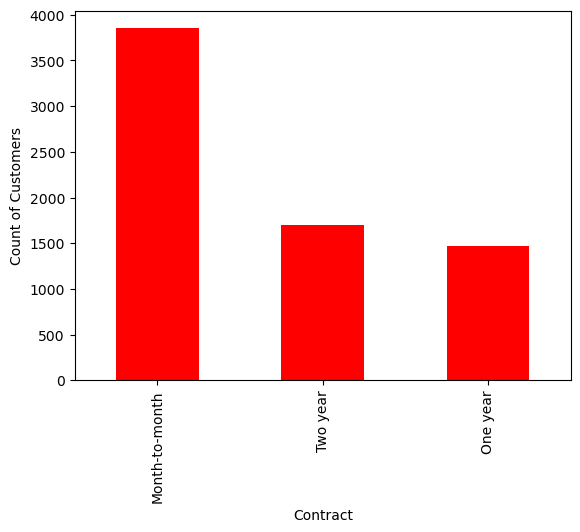

In [47]:
ax = df["Contract"].value_counts().plot(kind = "bar", color = "red")
ax.set_ylabel("Count of Customers")


In [49]:
# insights
# *The majority of the custs belong to month to month contract

<Axes: ylabel='count'>

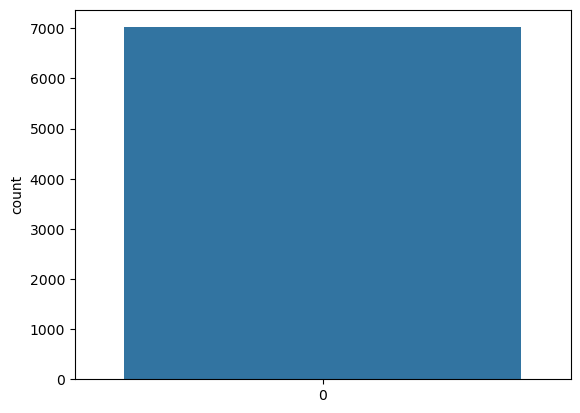

In [56]:
sns.countplot(df["Contract"])

In [50]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015349,0.219434,0.101628
tenure,0.015349,1.000000,0.245251,0.824164
MonthlyCharges,0.219434,0.245251,1.000000,0.649942
TotalCharges,0.101628,0.824164,0.649942,1.000000


In [51]:
#ENCODE THE DATA

In [52]:
encoder= LabelEncoder()

In [54]:
for x in df.columns:
    if df[x].dtype=="object":
        df[x]=encoder.fit_transform(df[x])

In [55]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,0.000878,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.101628,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.316758,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.062640,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.824164,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.114064,0.011323
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.451191,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.173281,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.254298,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.375233,-0.194214


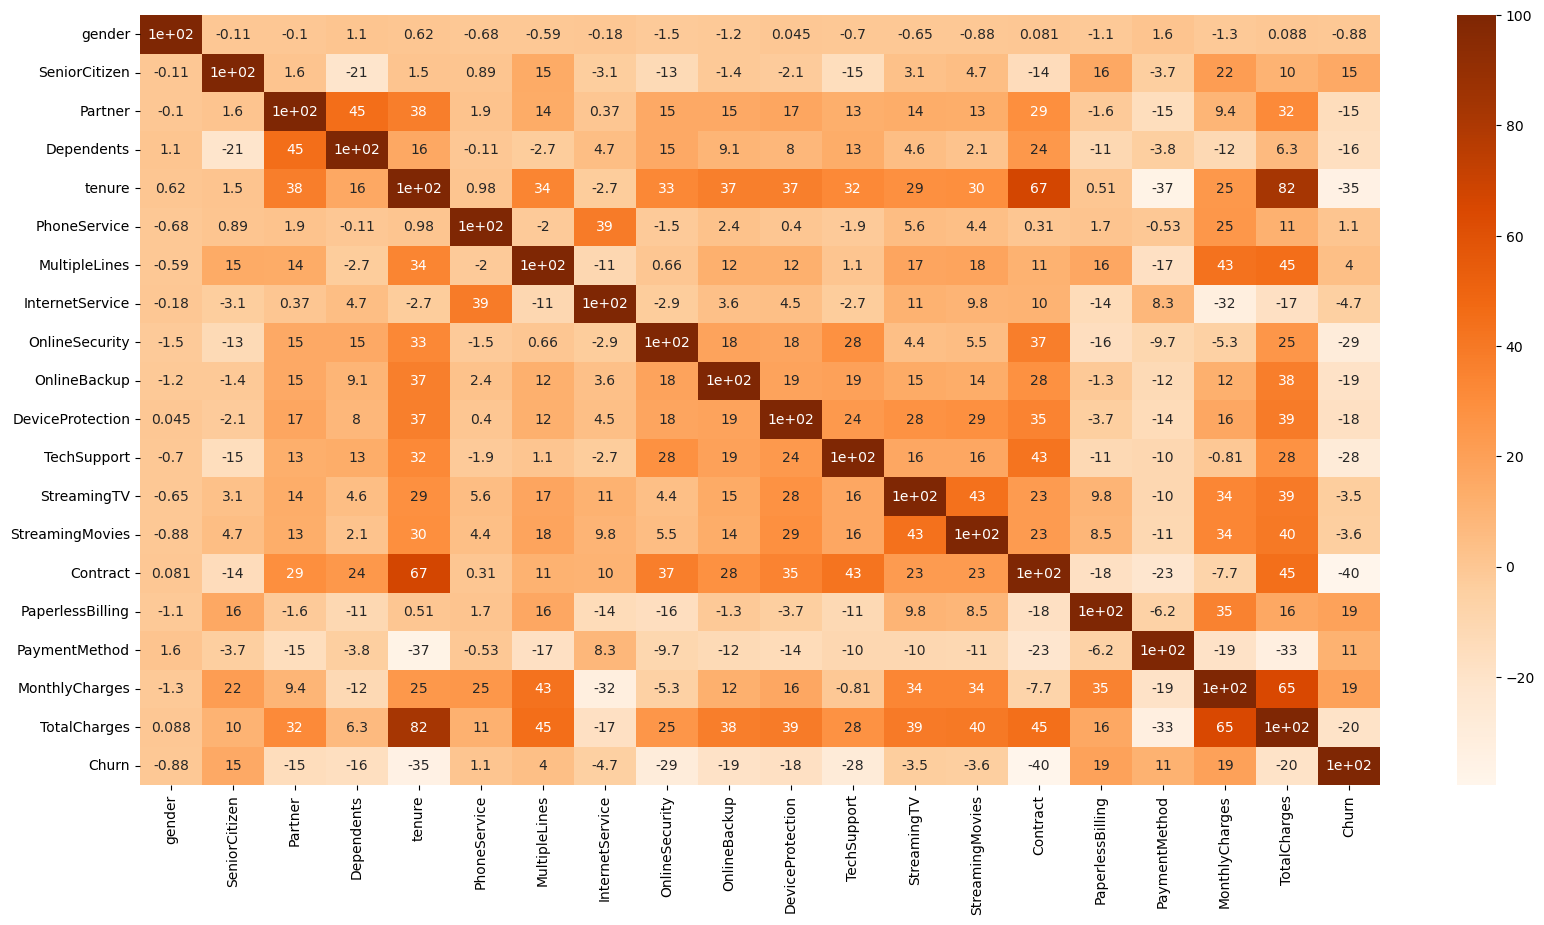

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100,annot=True,cmap="Oranges")
plt.show()

In [71]:
#Feature Division

In [73]:
# Input Features
X = df.drop("Churn", axis = 1)

# Target Features
Y = df["Churn"]

In [74]:
#Model Building

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20)

In [79]:
model = LogisticRegression()

In [80]:
model.fit(x_train, y_train)

/Users/arkadeepsarkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
pred = model.predict(x_test)

In [82]:
def helper_function(model, y_test, pred):
  print(f"Accuracy: {accuracy_score(y_test, pred)}")
  print("=============================================")
  print(classification_report(y_test, pred))

In [83]:
print("Logistic Regression")
helper_function(model, y_test, pred)

Logistic Regression
Accuracy: 0.8137813211845103
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1280
           1       0.68      0.59      0.63       476

    accuracy                           0.81      1756
   macro avg       0.77      0.74      0.75      1756
weighted avg       0.81      0.81      0.81      1756



In [87]:
model_DT = DecisionTreeClassifier()

In [88]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [89]:
pred = model_DT.predict(x_test)

In [90]:
print("Decision Tree Classifier")
helper_function(model_DT, y_test, pred)

Decision Tree Classifier
Accuracy: 0.7181093394077449
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1280
           1       0.48      0.46      0.47       476

    accuracy                           0.72      1756
   macro avg       0.64      0.64      0.64      1756
weighted avg       0.71      0.72      0.72      1756



In [91]:
model_RF = RandomForestClassifier()

In [92]:
model_RF.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
pred = model_RF.predict(x_test)

In [94]:
print("Random Forest Classifier")
helper_function(model_RF, y_test, pred)

Random Forest Classifier
Accuracy: 0.7870159453302962
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1280
           1       0.64      0.49      0.55       476

    accuracy                           0.79      1756
   macro avg       0.73      0.69      0.71      1756
weighted avg       0.78      0.79      0.78      1756



In [95]:
RF = 0.79

DT = 0.71

LR = 0.81

In [96]:
from sklearn.svm import SVC

In [97]:
model_SVM = SVC()

In [98]:
model_SVM.fit(x_train, y_train)

SVC()

In [99]:
pred = model_SVM.predict(x_test)

In [100]:
print("Support Vector Classifier")
helper_function(model_SVM, y_test, pred)

Support Vector Classifier
Accuracy: 0.7289293849658315
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1280
           1       0.00      0.00      0.00       476

    accuracy                           0.73      1756
   macro avg       0.36      0.50      0.42      1756
weighted avg       0.53      0.73      0.61      1756



/Users/arkadeepsarkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arkadeepsarkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/arkadeepsarkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
def function(model, prediction, actual_values):
  print(f"{accuracy_score(actual_values, prediction)}")

In [102]:
function(model_SVM, pred, y_test)

0.7289293849658315
